# 一、Hard-Margin SVM 与Soft-Margin SVM

> SVM 算法的一些缺点

* 当数据点在特征空间中不可分的时候失效

在SVM的前一部分中我们提到在边缘到决策边界之间是没有数据点的，只有支持向量在边缘上，其他的数据点都在决策边界以外。

这是基于数据点在特征空间中是线性可分的。但是有可能我们并不能找到一个非常好的特征映射函数，或者说找不到合适的kernel function使得原空间中的点被映射到特征空间中可分。这时如果我们使用之前所介绍的SVM算法，就不能够找到合适的决策边界使得特征空间被分开，SVM算法失效。

为了处理这种情况，我们有必要允许部分数据点能够落在边缘与决策边界之间。

故而最原始版本的SVM算法被称为Hard-Margin SVM，而这种在边缘与决策边界之间允许数据点存在的SVM算法被称为Soft-Margin SVM

* 容易过拟合

另外一个需要引入soft-margin SVM算法的原因是因为 hard-margin SVM 容易过拟合

#TODO 两张图

从上面左图可以看出如果样本在特征空间中能够被线性分开，hard-margin SVM 能够非常完美地把 特征空间的数据点给分开，其决策边界映射回
原空间中就是那条s型曲线，但是因为由于对训练数据的正确度太高，容易造成过拟合的问题，因此当对新的输入点进行预测的时候，过拟合的情况就会对
正确性产生影响。如上面右图所示，s型决策边界不如线性边界的效果好。因此我们需要对SVM进行正则化处理。

而soft-margin 通过允许数据点落在边缘与决策边界之间就能够解决上述两个问题

# 二、 soft-margin的分类约束



soft-margin 引入了松弛变量(slcak variable)的概念，对每一个数据点都有一个slack variable，即 $\xi _n \geq 0 , n=1,...N$ 

$\xi _n$定义如下：

* 当数据点落在边缘上或边缘两侧的时候， $\xi _n =0$

* 当数据点落在边缘与决策边界之间的时候， $\xi _n =\left\vert t_n - y(X_n) \right\vert >0$

由此我们可以发现:

对于决策边界上的点有$y(X_n)=0$,因此 $\xi _n=1$

而对于$\xi _n >1$的点将会被错误分类。

故分类的约束条件变为:

$$t_n y(X_n)\geq 1- \xi _n$$

从上述约束条件中可以看出，当$\xi _n >1$的时候，就会造成$t_n y(X_n) <0$从而造成误分类。

> 对$\xi _n$ 与分类的关系总结如下：
> * $\xi _n =0$ 的数据点处在边缘上或者在边缘的两侧，会被正确地分类
> * $0 <\xi _n \leq 1$的数据点处于边缘和决策边界之间，不过处于决策边界的正确一侧，会被正确分类
> * $\xi _n >1$的数据点将会处于决策边界的错误一侧并被错误分类,需要注意的是这些点有可能并不是处于边缘和决策边界之间，有可能超过了另一侧的边缘

以上情况请参照下图：
#TODO


# 三、soft-margin的理论分析

## 1.使margin最大化的数学表示
在引入slack variable之后，我们的目标是使用slack variable来进行正则化，使得margin最大化，即对于处在margin错误一侧的数据点加以惩罚。

因此我们需要`最小化`：

$$C \sum_{n=1}^{N} \xi _n + \frac{1}{2} \big \vert w \big \vert ^2$$

其中$C>0$，控制着边缘和slack variable之间的权衡，因为对于错误分类的点其 $\xi _n >1$，$\sum _n \xi _n$是被错误分类的数据点的数目的上限，因此C就是正则化的参数，起到对最小化训练误差与控制模型复杂度的折衷作用。

> $C \rightarrow \infty $ 的时候，soft-margin 变为 hard-margin

为了在约束：

$$
t_n y(X_n)\geq 1- \xi _n\\
\xi _n \geq 0
$$
下使得

$$C \sum_{n=1}^{N} \xi _n + \frac{1}{2} \big \vert w \big \vert ^2$$

最小化，我们可以使用拉格朗日乘数法：

$$L(w,b,\mathbf{a})=\frac{1}{2}\big \vert w \big \vert ^2 +C \sum_{n=1}^{N} \xi _n - \sum_{n=1}^{N}a_n \{ t_n y(X_n) -1 + \xi _n \} - \sum_{n=1}^{N}\mu_n \xi_n$$

相应的KKT条件为：

$$
a_n \geq 0 \\
t_n y(X_n) -1 + \xi_n \geq 0 \\
a_n \{ t_n y(X_n) -1 + \xi _n \} = 0 \\
\mu_n \geq 0 \\
\xi_n \geq 0 \\
\mu_n \xi_n=0 
$$

## 2.最优化函数的对称表示

分别对$w,b,\xi_n$进行求导并令其等于0，有：

$$
\mathbf{w}=\sum_{n=1}^{N}a_n t_n \phi(X_n) \\
\sum_{n=1}^{N}a_n t_n =0 \\
a_n = C- \mu_n
$$

将其代回到原式中，利用$\sum_{n=1}^{N}a_n t_n =0$来简化式子：

$$L(w,b,\mathbf{a})=\frac{1}{2}\big \vert w \big \vert ^2 +C \sum_{n=1}^{N} \xi_n - \sum_{n=1}^{N}a_n \{ t_n y(X_n) -1 + \xi _n \} - \sum_{n=1}^{N}\mu_n \xi_n\\
\\
\Rightarrow\\
L(w,b,\mathbf{a})=\frac{1}{2}\big \vert w \big \vert ^2 +C \sum_{n=1}^{N} \xi_n - \sum_{n=1}^{N}a_n \{ t_n \left( w^T\phi(X_n)+b \right) -1 + \xi _n \} - \sum_{n=1}^{N}\mu_n \xi_n
=\\
\frac{1}{2}w^Tw + C \sum_{n=1}^{N} \xi_n - \sum_{n=1}^{N}a_n t_n w^T\phi(X_n) -b \sum_{n=1}^{N}a_n t_n + \sum_{n=1}^{N}a_n -\sum_{n=1}^{N} a_n \xi_n -\sum_{n=1}^{N}\mu_n \xi_n\\
=\\
\frac{1}{2}w^Tw + C \sum_{n=1}^{N} \xi_n - \sum_{n=1}^{N}a_n t_n w^T\phi(X_n)+\sum_{n=1}^{N}a_n - \sum_{n=1}^{N}(a_n + \mu_n) \xi_n\\
=\\
\frac{1}{2}w^Tw + C \sum_{n=1}^{N} \xi_n - \sum_{n=1}^{N}a_n t_n w^T\phi(X_n)+\sum_{n=1}^{N}a_n - C\sum_{n=1}^{N}\xi_n\\
=\\
\sum_{n=1}^{N}a_n+ \frac{1}{2}w^Tw -\sum_{n=1}^{N}a_n t_n w^T\phi(X_n)\\
=\\
\sum_{n=1}^{N}a_n- \frac{1}{2} \sum_{n=1}^{N}\sum_{m=1}^{N}a_n a_m t_n t_m k(X_n,X_m)
$$

约束为：

$$
0 \leq a_n \leq C  , n=1,...N\\
\\
\sum_{n=1}^{N}a_n t_n =0
$$
我们发现上面这个拉格朗日乘数法的式子与hard-margin的完全相同，除了约束部分$a_n \leq C$之外。

我们也可以如hard-margin中一样，将上述对称表示写成矩阵的形式：


$$
\tilde{L}(\mathbf{a})=\mathbf{1}^T\mathbf{a}-\frac{1}{2}\mathbf{a}^T \mathbf{t} \mathbf{K} \mathbf{t} \mathbf{a}
$$

约束为：

$$
0 \leq a_n \leq C  , n=1,...N\\
\\
\sum_{n=1}^{N}a_n t_n =0
$$

## 3.soft-margin中的支持向量是那些点

soft-margin对新的输入的预测函数依然是：

$$y(x)=\sum_{n=1}^{N}a_n t_n k(x,X_n)+b$$

故那些$a_n =0$的点对于预测模型并无影响，所以那些$a_b \neq 0$的点才被称为支持向量，

> 在 soft-margin中，支持向量不仅包括那些处于边缘处的点，也包括那些处于边缘和决策边界之间的点，以及被错误分类的店。

因为对于$a_n >0$的点一定满足：

$$
t_n y(X_n)=1-\xi_n
$$

* 如果$a_n < C$,那么$\mu_n>0$,根据约束条件有 $\xi_n=0$,那么这些支持向量位于边缘上
* 如果$a_n = C$，那么$\xi_n>0$

  如果 $\xi_n \leq 1$ ,支持向量在边缘和决策边界的中间，不过在决策边界的正确一边，将被正确分类
  
  如果 $\xi_n > 1$,支持向量在决策边界的错误一边，将被错误分类


## 4.如何求y(x)中的b

对于那些$0<a_n<C$的点，$\xi_n=0$,这些点位于margin上，从而有$t_ny(X_n)=1$,因此有：

$$t_n\left( \sum_{m \in \mathbf{s}} a_m t_m k(X_n,X_m)+b \right)=1$$

又因$t_n \in \{-1,1\}$,所以$t_n ^2=1$,那么将上式左右乘以$t_n$有：

$$b=t_n- \sum_{m \in \mathbf{s}} a_m t_m k(X_n,X_m) $$

但是这里只使用了一个满足条件$0<a_n<C$的点$t_n$,我们可以使用所有的刚好处在margin上的支持向量并求平均：

$$b=\frac{1}{N_M}\sum_{n \in M} \left(t_n- \sum_{m \in \mathbf{s}} a_m t_m k(X_n,X_m) \right)$$

其中$mathbf{s}$表示所有的支持向量，$M$表示刚好处在margin上的支持向量


## 如何实现一个非线性的soft-margin SVM

与上一篇博客中的hard-margin相比，soft-margin只用在二次规划部分加一个常量C使得$a_n\leq C$即可

In [1]:
%matplotlib inline

import numpy as np
from scipy.linalg import norm
import cvxopt
import cvxopt.solvers
from pylab import *

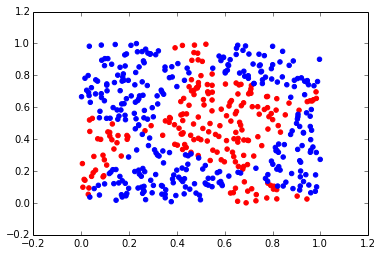

In [5]:
data=np.loadtxt('data.txt')

# 获得训练数据
X = data[:,0:2]
t=data[:,2]
t = 2*t-3  # 将类别由1，2 转换成为-1，1

indexOfClass1=t==-1

indexOfClass2=t==1

scatter(X[indexOfClass1,0],X[indexOfClass1,1],color='r')
scatter(X[indexOfClass2,0],X[indexOfClass2,1],color='b')

     pcost       dcost       gap    pres   dres
 0:  1.1017e+07 -1.4106e+08  2e+08  1e-01  5e-13
 1:  6.5628e+06 -1.6014e+07  3e+07  1e-02  2e-12
 2:  1.8209e+06 -3.5314e+06  6e+06  2e-03  6e-13
 3:  3.7936e+05 -6.9480e+05  1e+06  1e-04  2e-13
 4:  7.1866e+04 -1.2283e+05  2e+05  1e-05  1e-13
 5:  9.1597e+03 -1.7963e+04  3e+04  2e-12  9e-14
 6:  2.1474e+03 -8.3742e+03  1e+04  2e-13  6e-14
 7: -6.5775e+02 -6.0722e+03  5e+03  8e-13  8e-14
 8: -2.0261e+03 -4.8622e+03  3e+03  2e-12  1e-13
 9: -2.7831e+03 -3.9420e+03  1e+03  1e-12  1e-13
10: -3.1904e+03 -3.4766e+03  3e+02  6e-13  1e-13
11: -3.2749e+03 -3.3663e+03  9e+01  7e-13  1e-13
12: -3.3072e+03 -3.3269e+03  2e+01  8e-13  1e-13
13: -3.3158e+03 -3.3163e+03  6e-01  1e-12  1e-13
14: -3.3160e+03 -3.3160e+03  7e-03  1e-13  1e-13
15: -3.3160e+03 -3.3160e+03  9e-05  7e-13  1e-13
Optimal solution found.
[33, 61, 62, 66, 90, 91, 93, 94, 95, 121, 131, 138, 152, 160, 165, 172, 202, 206, 211, 215, 216, 233, 243, 249, 254, 334, 352, 366, 367, 370, 39

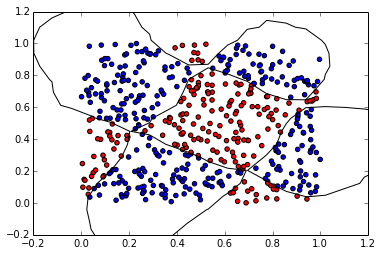

In [6]:
"""
非线性SVM

使用了cvxopt中的Quadratic Programming，要先安装cvxopt：sudo -H pip install cvxopt
"""

N = len(X)         #训练数据的个数
P = 3           # 多项式核的阶数
C = 1000
SIGMA = 0.125     # RBF kernel 中的sigma数，至于为什么将sigma设定为0.125就涉及到另外一个话题，参数寻找，可以查看我的其他博客

# 多项式 kernel
def polynomial_kernel(x, y):
    return (1 + np.dot(x, y)) ** P

# RBF kernel
def gaussian_kernel(x, y):
    return np.exp(- norm(x-y)**2 / (2 * (SIGMA ** 2)))

# 选定RBF kenel
kernel = gaussian_kernel

# 对于新的输入x求y(x)
def f(x, a, t, X, b):
    summation = 0.0
    for n in range(N):
        summation += a[n] * t[n] * kernel(x, X[n])
    return summation + b



# 计算gram matrix 注意这里根据 L(a)的公式部分将t_nt_jK(X_n,X_m)直接写在了一起
K = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        K[i, j] = t[i] * t[j] * kernel(X[i], X[j])

        
#属于数值优化部分，不详解，请参考相关文档
Q = cvxopt.matrix(K)
p = cvxopt.matrix(-np.ones(N))
temp1 = np.diag([-1.0] * N)
temp2 = np.identity(N)
G = cvxopt.matrix(np.vstack((temp1, temp2)))
temp1 = np.zeros(N)
temp2 = np.ones(N) * C
h = cvxopt.matrix(np.hstack((temp1, temp2)))
A = cvxopt.matrix(t, (1, N))
b = cvxopt.matrix(0.0)
sol = cvxopt.solvers.qp(Q, p, G, h, A, b)
a = array(sol['x']).reshape(N)

# 找到支持向量，对于支持向量而言，a_n >0
#而恰好在边缘上的点 0<a_n<C
S = []
M = []
for n in range(len(a)):
    # 0.001より小さいのは0とみなしてサポートベクトルとみなさない
    if a[n] > 0.001:
        S.append(n)
    if 0.001 < a[n] < C:
        M.append(n)

# 计算b
summation = 0
for n in M:
    temp = 0
    for m in S:
        temp += a[m] * t[m] * kernel(X[n], X[m])
    summation += (t[n] - temp)
b = summation / len(M)

print S, b

# 绘制训练数据
for n in range(N):
    if t[n] > 0:
        scatter(X[n,0], X[n,1], c='b', marker='o')
    else:
        scatter(X[n,0], X[n,1], c='r', marker='o')



# 绘制决策边界
X1, X2 = meshgrid(linspace(-2,2,50), linspace(-2,2,50))
w, h = X1.shape
X1.resize(X1.size)
X2.resize(X2.size)
Z = array([f(array([x1, x2]), a, t, X, b) for (x1, x2) in zip(X1, X2)])
X1.resize((w, h))
X2.resize((w, h))
Z.resize((w, h))
CS = contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')

xlim(-0.2, 1.2)
ylim(-0.2, 1.2)
show()